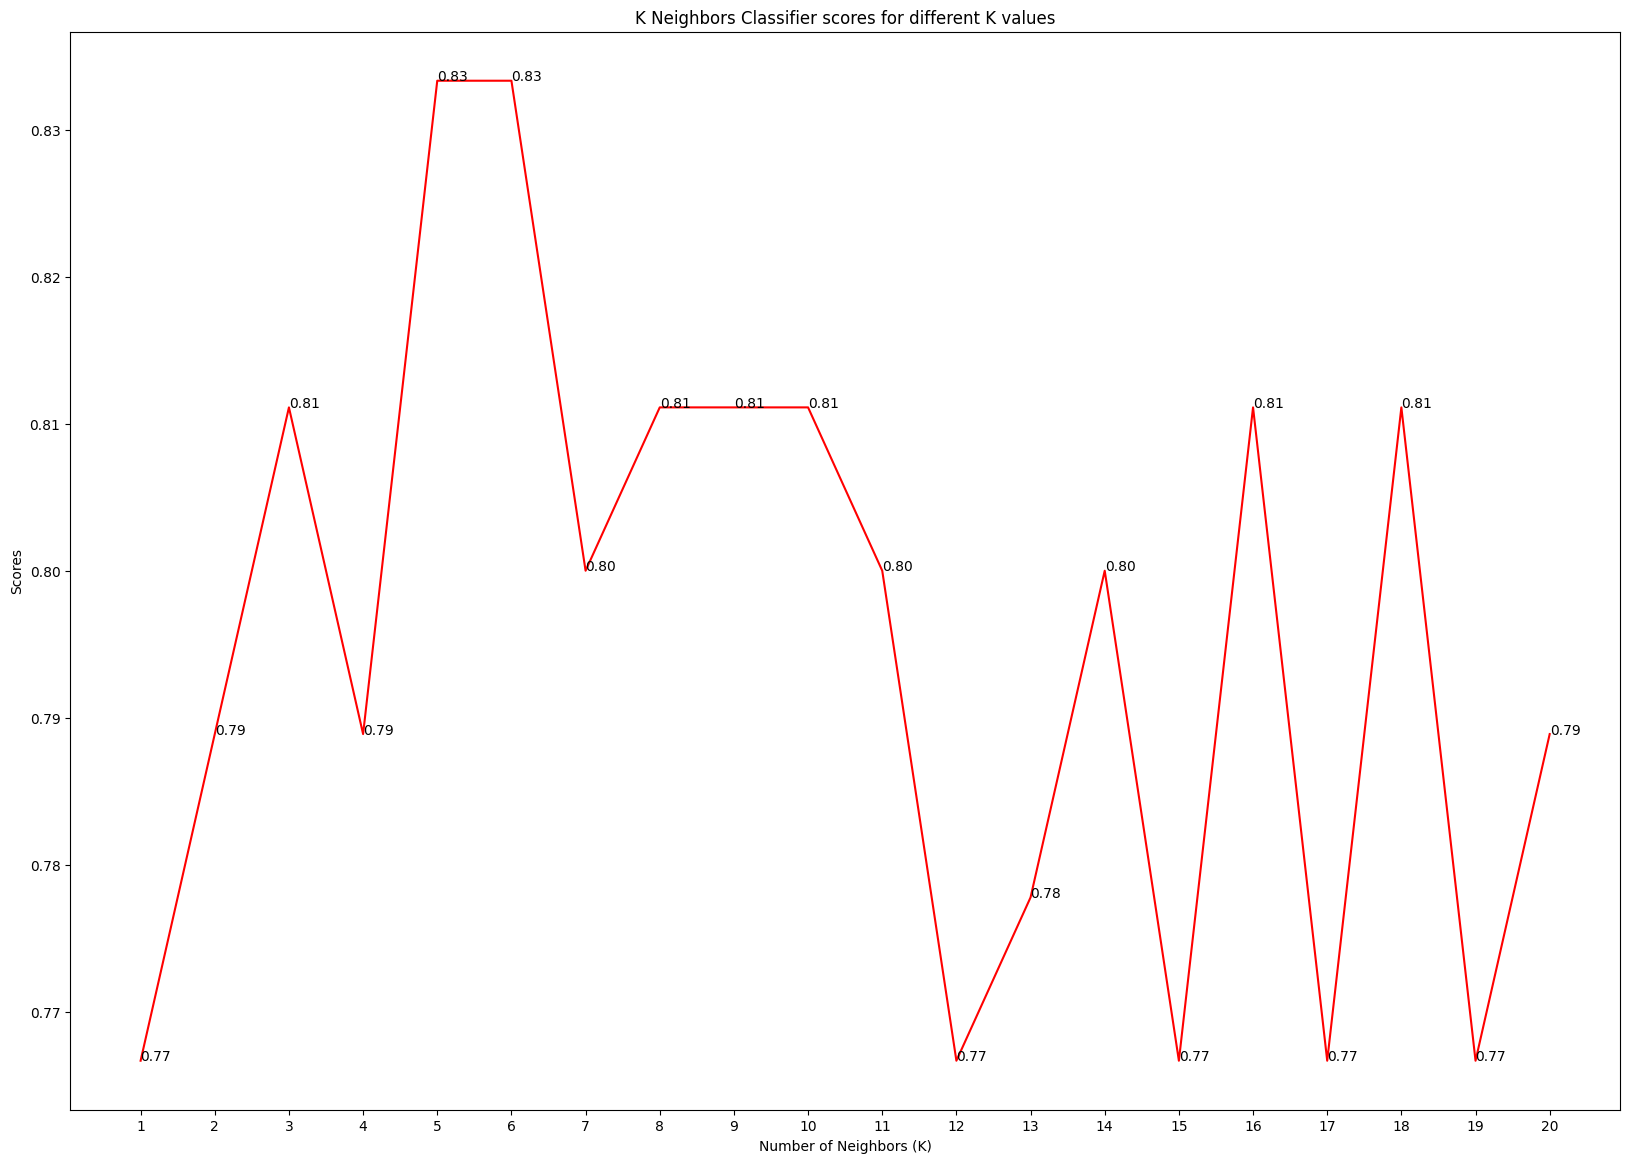

The best score for K Neighbors Classifier is 83.33% with 5 neighbors.


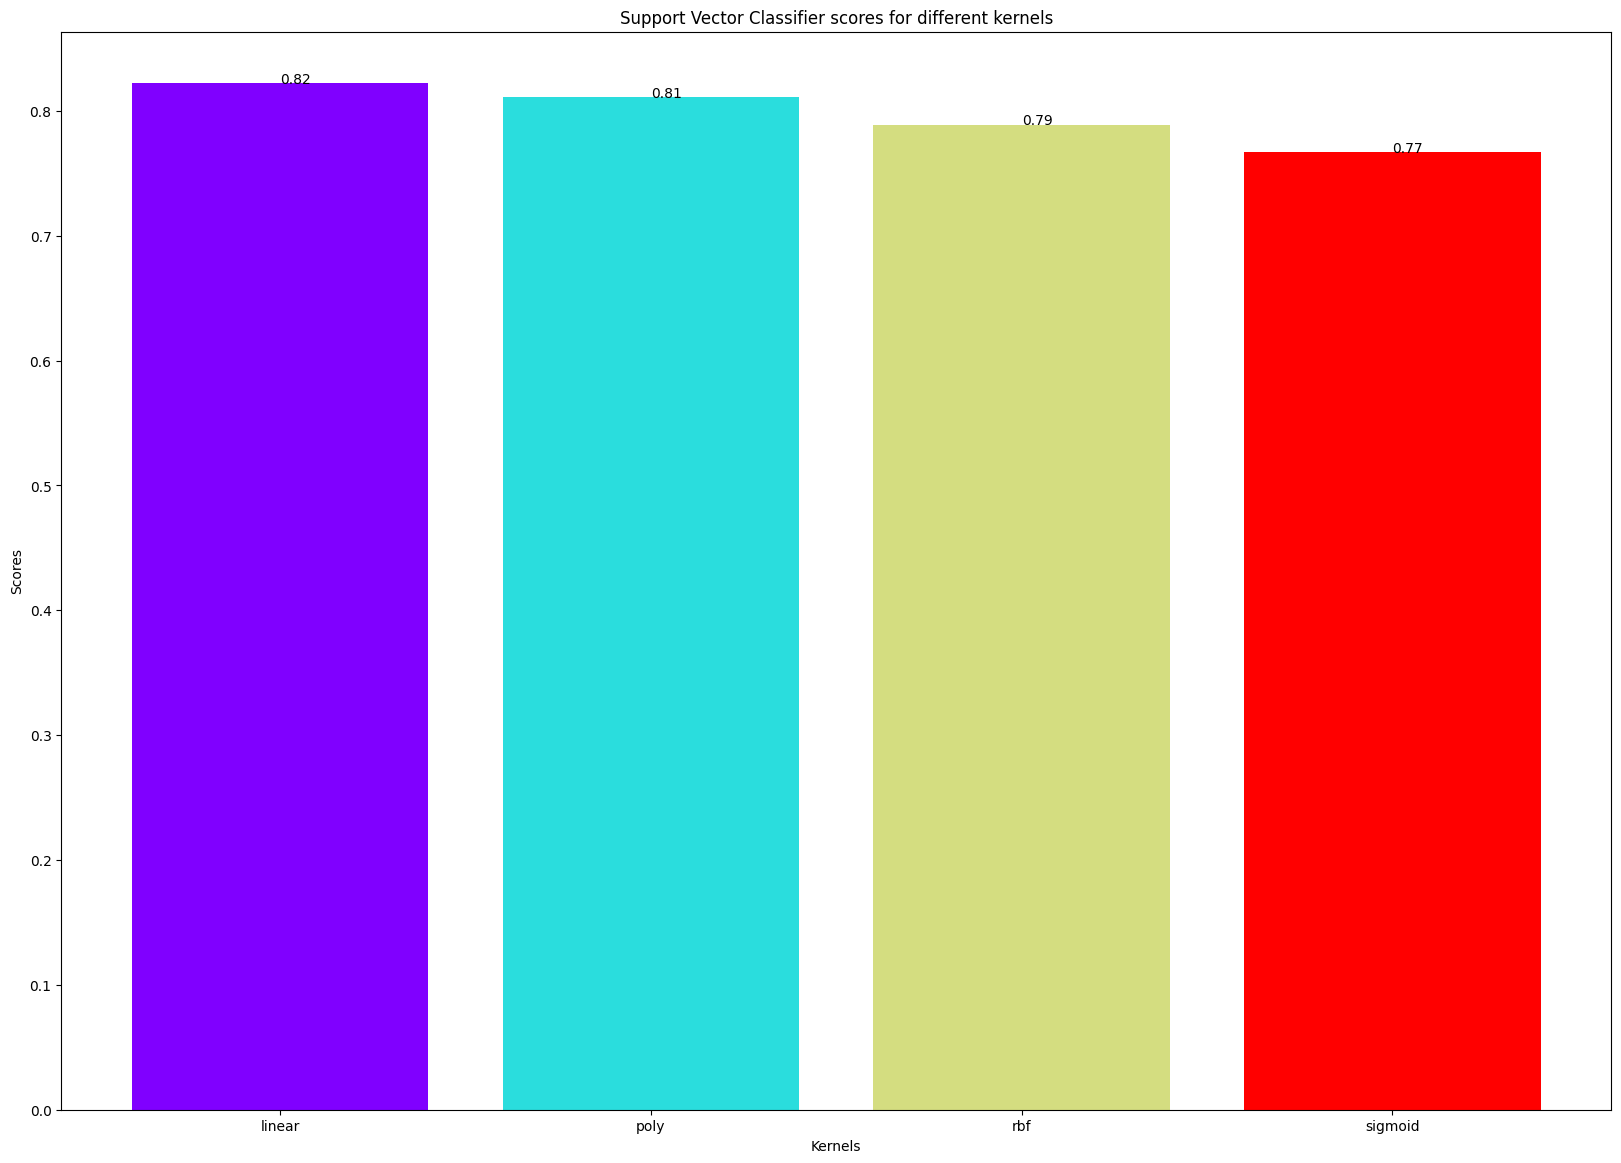

The best score for Support Vector Classifier is 82.22% with 'linear' kernel.


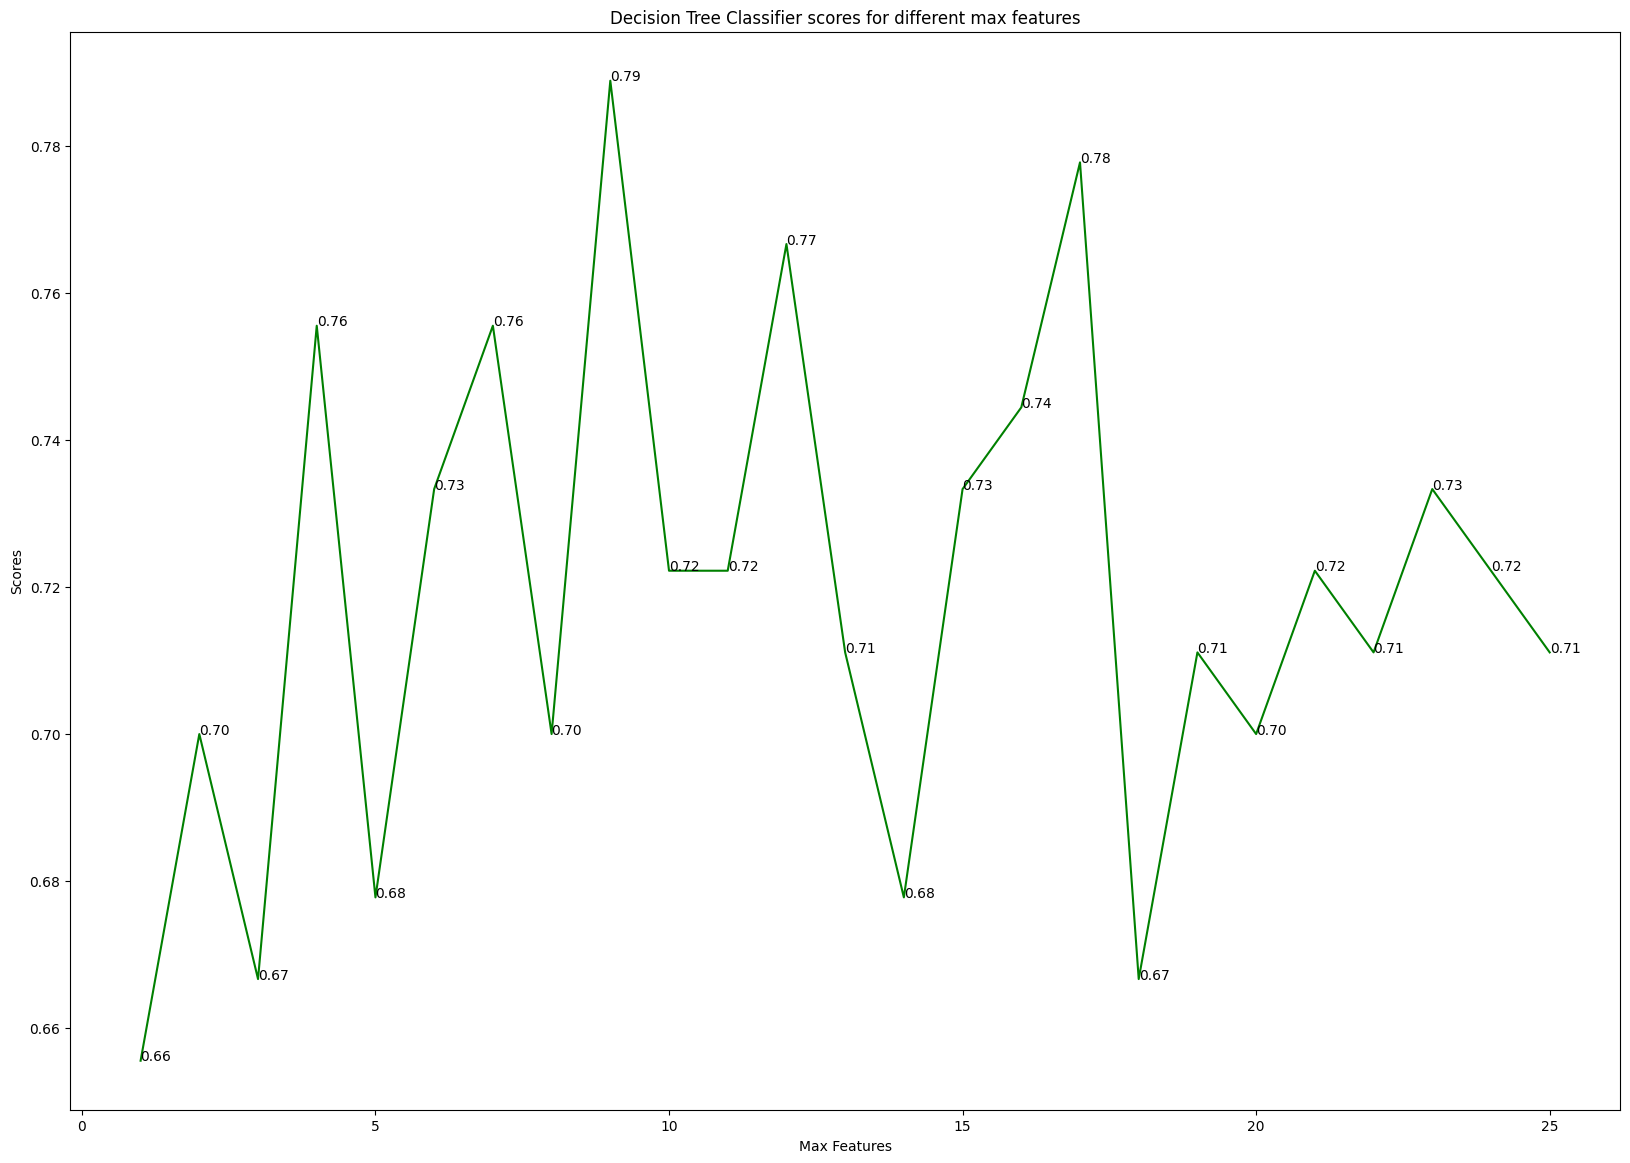

The best Decision Tree accuracy is 78.89% with 9 max features.


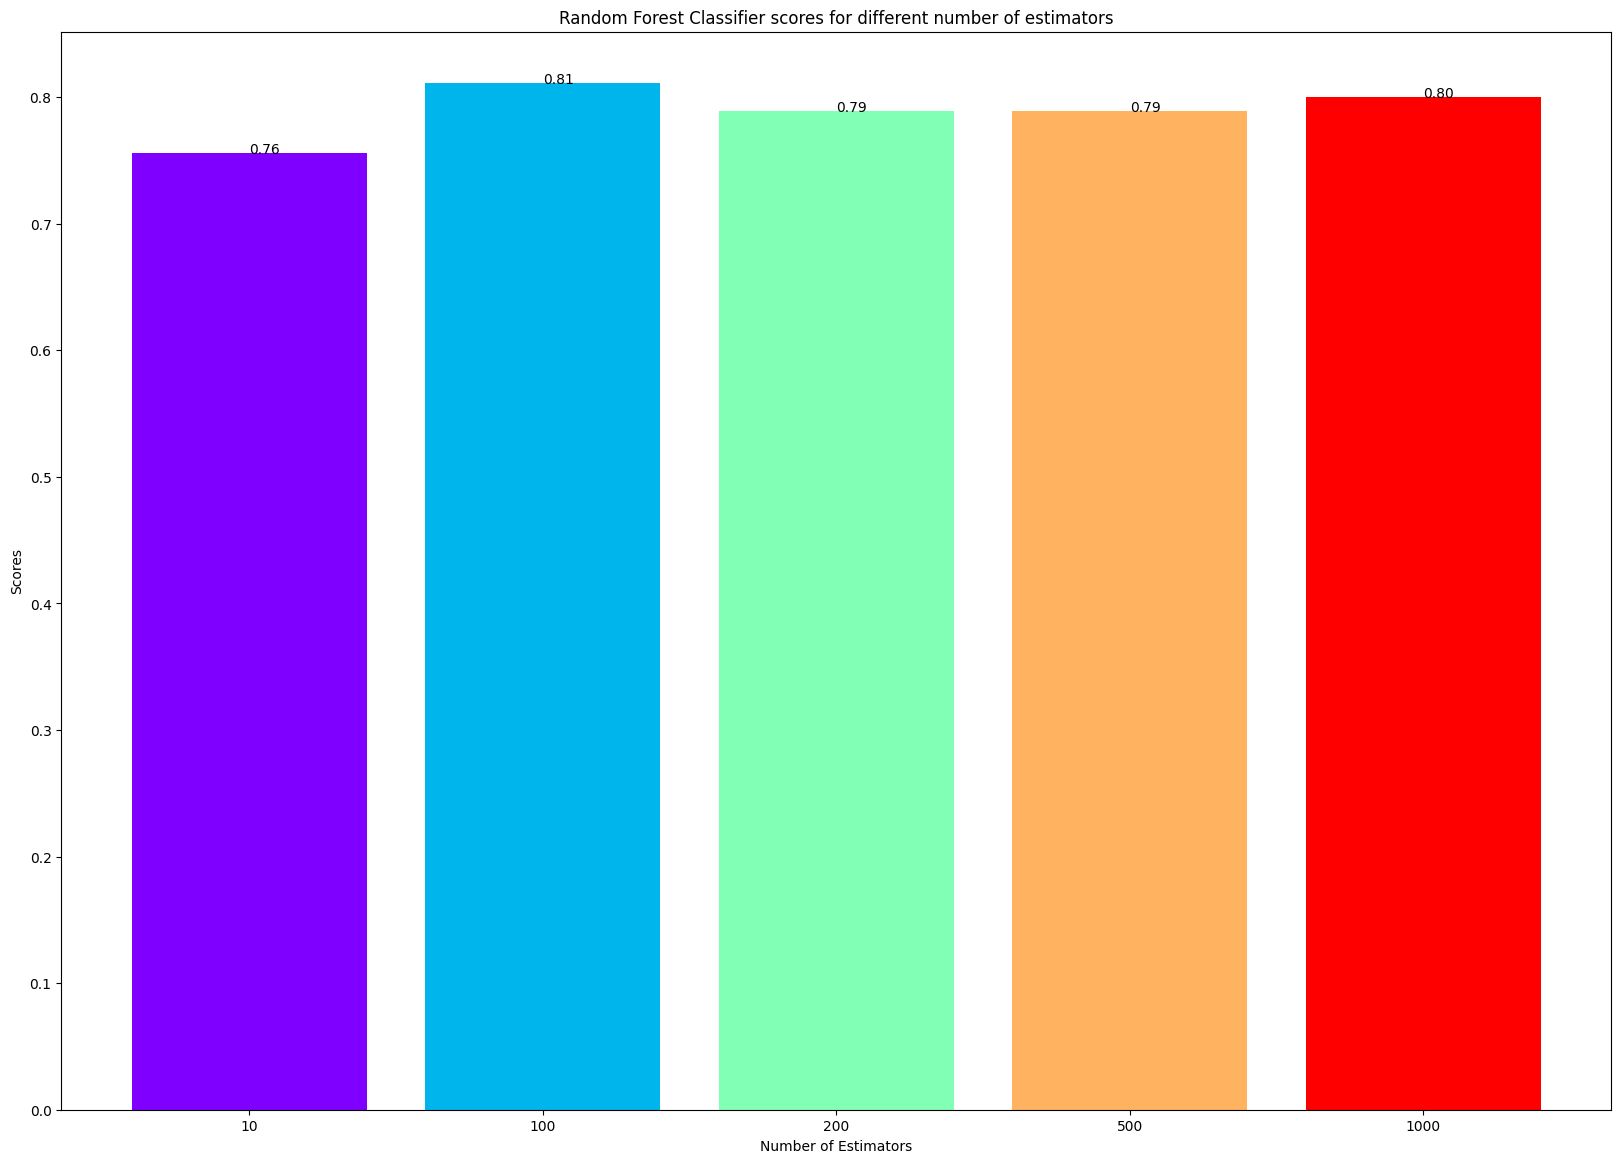

The best Random Forest accuracy is 81.11% with 100 estimators.

✅ The best model is: KNN with accuracy: 83.33%

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.83      0.85        53
           2       0.78      0.84      0.81        37

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



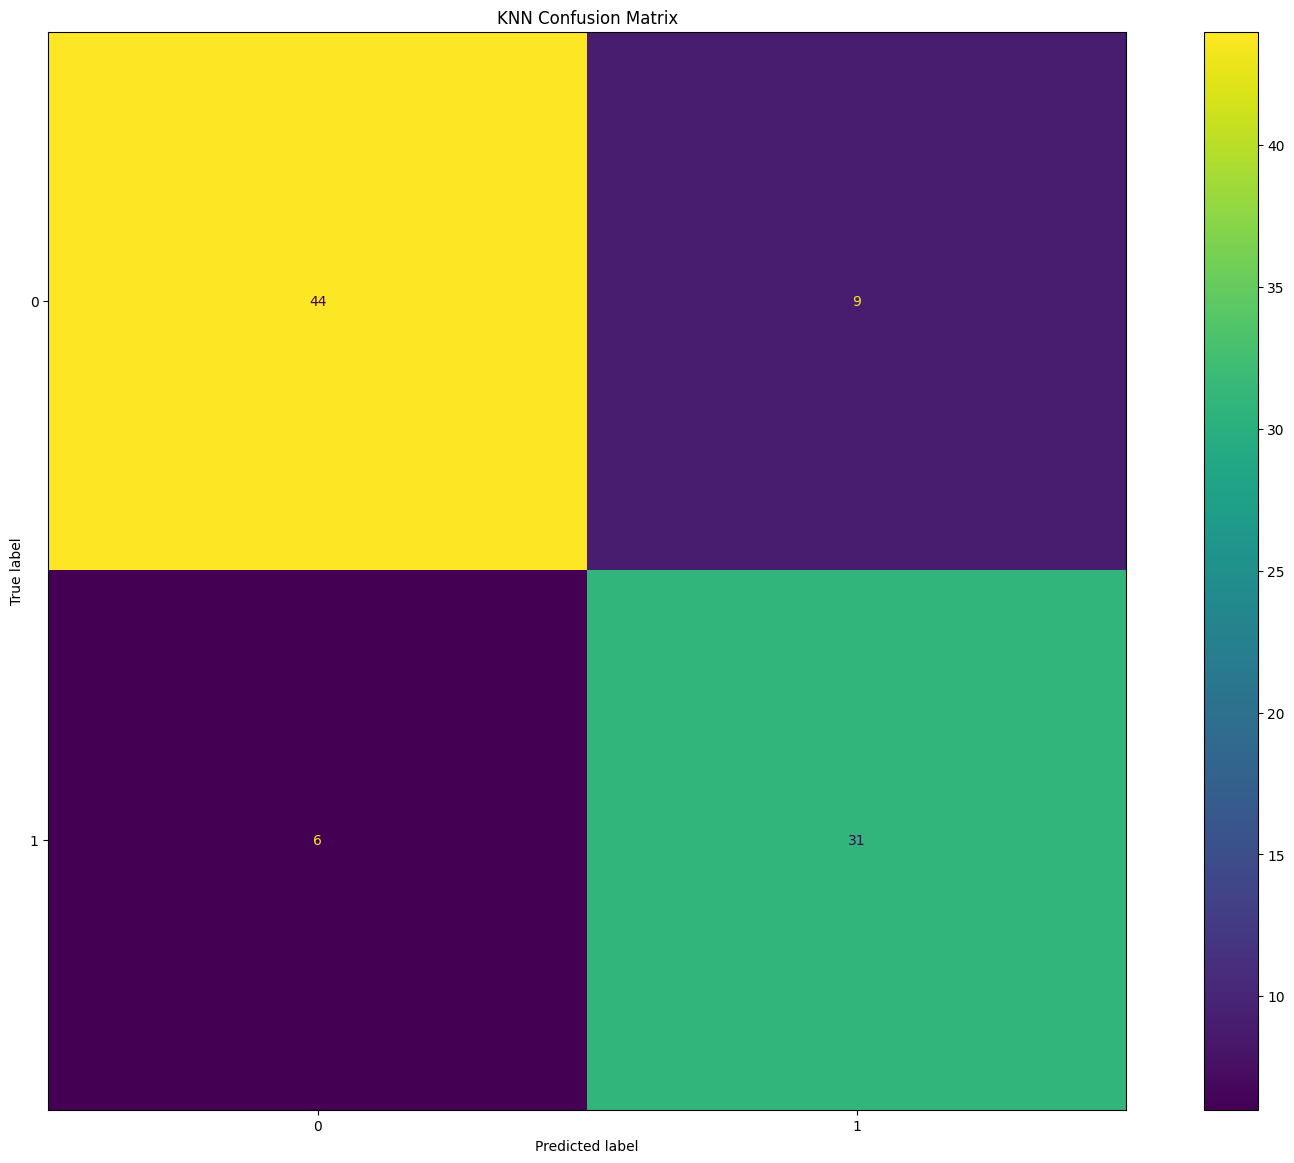


✅ Model saved locally as: 'knn_model.joblib'


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings
warnings.filterwarnings('ignore')

# Visual settings
rcParams['figure.figsize'] = 20, 14

# Load and clean data
dataset = pd.read_csv('dataset_heart.csv')
dataset.rename(columns={'heart disease': 'HeartDisease'}, inplace=True)
dataset.columns = dataset.columns.str.strip().str.replace(' ', '_')

# Preprocessing
cols_to_encode = ['chest_pain_type', 'resting_electrocardiographic_results',
                 'ST_segment', 'major_vessels', 'thal']
dataset = pd.get_dummies(dataset, columns=cols_to_encode)

columns_to_scale = ['age', 'resting_blood_pressure', 'serum_cholestoral',
                   'max_heart_rate', 'oldpeak']
scaler = StandardScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

# Save the scaler for deployment
dump(scaler, 'heart_scaler.joblib')

# Split data
y = dataset['HeartDisease']
X = dataset.drop('HeartDisease', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# ========== KNN ==========
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

plt.plot(range(1, 21), knn_scores, color='red')
for i in range(1, 21):
    plt.text(i, knn_scores[i - 1], f"{knn_scores[i - 1]:.2f}")
plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

best_k = np.argmax(knn_scores) + 1
best_knn_score = knn_scores[best_k - 1]
print(f"The best score for K Neighbors Classifier is {best_knn_score * 100:.2f}% with {best_k} neighbors.")

# ========== SVM ==========
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
colors = rainbow(np.linspace(0, 1, len(kernels)))

for kernel in kernels:
    svc_classifier = SVC(kernel=kernel, random_state=0)
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

plt.bar(kernels, svc_scores, color=colors)
for i, score in enumerate(svc_scores):
    plt.text(i, score, f"{score:.2f}")
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

best_kernel = kernels[np.argmax(svc_scores)]
print(f"The best score for Support Vector Classifier is {max(svc_scores) * 100:.2f}% with '{best_kernel}' kernel.")

# ========== Decision Tree ==========
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

plt.plot(range(1, len(X.columns) + 1), dt_scores, color='green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i - 1], f"{dt_scores[i - 1]:.2f}")
plt.xlabel('Max Features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different max features')
plt.show()

best_dt_features = np.argmax(dt_scores) + 1
print(f"The best Decision Tree accuracy is {max(dt_scores) * 100:.2f}% with {best_dt_features} max features.")

# ========== Random Forest ==========
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
colors = rainbow(np.linspace(0, 1, len(estimators)))

for n in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

plt.bar(range(len(estimators)), rf_scores, color=colors)
for i, score in enumerate(rf_scores):
    plt.text(i, score, f"{score:.2f}")
plt.xticks(range(len(estimators)), [str(est) for est in estimators])
plt.xlabel('Number of Estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
plt.show()

best_rf_index = np.argmax(rf_scores)
best_rf_estimators = estimators[best_rf_index]
best_rf_score = rf_scores[best_rf_index]
print(f"The best Random Forest accuracy is {best_rf_score * 100:.2f}% with {best_rf_estimators} estimators.")

# ========== Best Model Summary ==========
models_scores = {
    'KNN': best_knn_score,
    'SVC': max(svc_scores),
    'Decision Tree': max(dt_scores),
    'Random Forest': best_rf_score
}

best_model_name = max(models_scores, key=models_scores.get)
print(f"\n✅ The best model is: {best_model_name} with accuracy: {models_scores[best_model_name] * 100:.2f}%")

# ========== Final Model Training ==========
if best_model_name == 'KNN':
    final_model = KNeighborsClassifier(n_neighbors=best_k)
elif best_model_name == 'SVC':
    final_model = SVC(kernel=best_kernel, random_state=0)
elif best_model_name == 'Decision Tree':
    final_model = DecisionTreeClassifier(max_features=best_dt_features, random_state=0)
else:
    final_model = RandomForestClassifier(n_estimators=best_rf_estimators, random_state=0)

final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()
plt.title(f'{best_model_name} Confusion Matrix')
plt.show()

# ========== Model Saving ==========
model_filename = f'{best_model_name.lower().replace(" ", "_")}_model.joblib'
dump(final_model, model_filename)
print(f"\n✅ Model saved locally as: '{model_filename}'")

# Save feature names
with open('feature_names.txt', 'w') as f:
    f.write('\n'.join(X.columns.tolist()))